In [7]:
# Import libraries
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)
import requests
import matplotlib.pyplot as plt
import json
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [8]:
# Read csv and create dataframe
from google.colab import files
uploaded = files.upload()

Saving Levels_Fyi_Salary_Data.csv to Levels_Fyi_Salary_Data (1).csv


In [9]:
import io
salaries_df = pd.read_csv(io.BytesIO(uploaded['Levels_Fyi_Salary_Data.csv']))

In [10]:
from google.colab import files
uploaded = files.upload()

Saving layoffs.csv to layoffs (1).csv


In [11]:
layoffs_df = pd.read_csv(io.BytesIO(uploaded['layoffs.csv']))

In [12]:
salaries_df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [13]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  int64  
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [14]:
layoffs_df.columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'date', 'stage', 'country', 'funds_raised'],
      dtype='object')

In [16]:
salaries_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [17]:
layoffs_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,N26,Berlin,Finance,71.0,0.04,2023-04-28,Series E,United States,1700.0
1,Providoor,Melbourne,Food,NaN,1.00,2023-04-28,Unknown,Australia,NaN
2,Dropbox,SF Bay Area,Other,500.0,0.16,2023-04-27,Post-IPO,United States,1700.0
3,Vroom,New York City,Transportation,120.0,0.11,2023-04-27,Post-IPO,United States,1300.0
4,Greenhouse,New York City,Recruiting,100.0,0.12,2023-04-27,Private Equity,United States,110.0


In [15]:
layoffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              2545 non-null   object 
 1   location             2545 non-null   object 
 2   industry             2543 non-null   object 
 3   total_laid_off       1746 non-null   float64
 4   percentage_laid_off  1694 non-null   float64
 5   date                 2543 non-null   object 
 6   stage                2539 non-null   object 
 7   country              2545 non-null   object 
 8   funds_raised         2297 non-null   float64
dtypes: float64(3), object(6)
memory usage: 179.1+ KB


In [ ]:
salaries_df['level'].value_counts()

L4                              5014
L5                              4871
L3                              3337
L6                              2871
Senior Software Engineer        1443
                                ... 
Gr 7                               1
Senior BA                          1
Consulting Analyst                 1
Senior Technical Director II       1
Bioinformatics Scientist II        1
Name: level, Length: 2916, dtype: int64

In [18]:
salaries_df['timestamp'] = pd.to_datetime(salaries_df['timestamp'])
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62637 non-null  object        
 2   level                    62523 non-null  object        
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  int64         
 5   location                 62642 non-null  object        
 6   yearsofexperience        62642 non-null  float64       
 7   yearsatcompany           62642 non-null  float64       
 8   tag                      61788 non-null  object        
 9   basesalary               62642 non-null  int64         
 10  stockgrantvalue          62642 non-null  float64       
 11  bonus                    62642 non-null  float64       
 12  gender                   43102 n

In [19]:
salaries_df['Year'] = salaries_df['timestamp'].dt.year 

In [20]:
salaries_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Year
0,2017-06-07 11:33:00,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,NaN,NaN,2017
1,2017-06-10 17:11:00,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,NaN,NaN,2017
2,2017-06-11 14:53:00,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,NaN,NaN,2017
3,2017-06-17 00:23:00,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,NaN,NaN,2017
4,2017-06-20 10:58:00,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,NaN,NaN,2017


In [46]:
# salaries_df[['city']] = salaries_df['location'].str.split(",")   
salaries_df['city'] = salaries_df['location'].str.split(',').str.get(0)


In [47]:
salaries_df['city']

0         Redwood City
1        San Francisco
2              Seattle
3            Sunnyvale
4        Mountain View
             ...      
62637          Seattle
62638          Redmond
62639          Seattle
62640    San Francisco
62641        Sunnyvale
Name: city, Length: 62642, dtype: object

In [48]:
location = []
[location.append(x) for x in salaries_df.city]
print(location)

['Redwood City', 'San Francisco', 'Seattle', 'Sunnyvale', 'Mountain View', 'Seattle', 'Redmond', 'Seattle', 'Redmond', 'Seattle', 'San Francisco', 'Bellevue', 'Redmond', 'Seattle', 'Seattle', 'Seattle', 'Menlo Park', 'San Francisco', 'London', 'Redmond', 'Sunnyvale', 'Bellevue', 'Seattle', 'Seattle', 'Seattle', 'Redmond', 'Cupertino', 'Seattle', 'Mountain View', 'New York', 'Seattle', 'Los Gatos', 'Cupertino', 'Dublin', 'Seattle', 'Redmond', 'Cupertino', 'San Francisco', 'Redmond', 'Redmond', 'San Francisco', 'San Francisco', 'Seattle', 'Seattle', 'Sunnyvale', 'Baltimore', 'San Francisco', 'San Francisco', 'Menlo Park', 'Seattle', 'Seattle', 'Cupertino', 'Seattle', 'San Francisco', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Seattle', 'Sunnyvale', 'Seattle', 'Seattle', 'Seattle', 'Cupertino', 'San Francisco', 'Seattle', 'Seattle', 'San Francisco', 'Redmond', 'Mountain View', 'Sunnyvale', 'Cupertino', 'Cupertino', 'Seattle', 'Seattle', 'Seattle', 'Mountain View', 'San Franci

In [49]:
!pip install geopy
import geopy
from geopy.geocoders import Nominatim
# referenced https://www.tutorialspoint.com/how-to-get-the-longitude-and-latitude-of-a-city-using-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

In [52]:
# Create empty lists to hold latitudes and longitudes
lat = []
lng = []

# Iterate through City column with Nominatim API object, geolocator, to search for geocodes by city name
for x in location:
    coord = geolocator.geocode(x);
    
    # Append latitude and longitude values to empty lists
    lat.append(coord.latitude);
    lng.append(coord.longitude)

KeyboardInterrupt: ignored

In [ ]:
level = salaries_df.groupby('level')['totalyearlycompensation'].count().to_frame()

Text(0.5, 1.0, 'Compensation by Level')

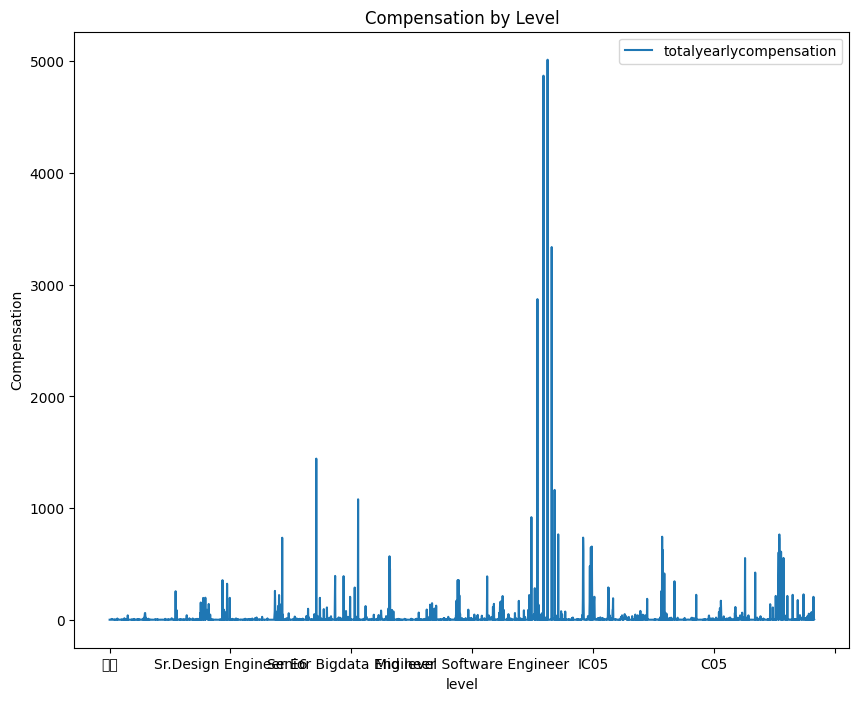

In [ ]:
level_sorted = level.sort_values("level", ascending=False)
level_sorted.plot(legend=True, figsize=(10,8))
plt.xlabel("level")
plt.ylabel("Compensation")
plt.title("Compensation by Level")

In [ ]:
reduced_df = salaries_df[['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'gender', 'cityid', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education']]

In [ ]:
dummies_df = pd.get_dummies(reduced_df)
dummies_df.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,cityid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,...,Race_Asian,Race_Black,Race_Hispanic,Race_Two Or More,Race_White,Education_Bachelor's Degree,Education_Highschool,Education_Master's Degree,Education_PhD,Education_Some College
0,127000,1.5,1.5,7392,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100000,5.0,3.0,7419,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,310000,8.0,0.0,11527,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,372000,7.0,5.0,7472,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,157000,5.0,3.0,7322,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Split our preprocessed data into our features and target arrays
X = dummies_df.drop(columns=["totalyearlycompensation"]).values
y = dummies_df["totalyearlycompensation"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
X.shape

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=12364))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

In [ ]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")